In [1]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('../data/exams.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [2]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
male_df = df[df['gender'] == 'male']
female_df = df[df['gender']=='female']

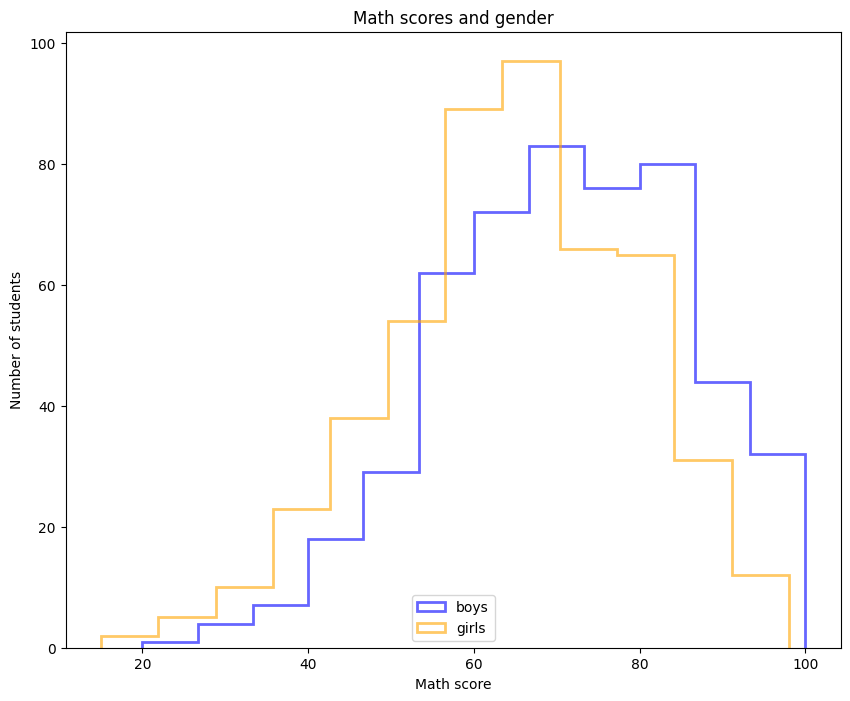

In [6]:
plt.figure(figsize=(10, 8))
plt.hist(x=male_df['math score'], bins=12, density=False, alpha=0.6, color='blue', histtype = 'step', linewidth = 2) 

plt.hist(x=female_df['math score'], bins=12, density=False, alpha=0.6, color='orange', histtype = 'step', linewidth = 2)
legend_labels = ["boys", "girls"]
plt.legend(legend_labels, loc=8)
plt.title('Math scores and gender')
plt.xlabel('Math score')
plt.ylabel('Number of students')
# plt.savefig('my_histogram.png')
plt.show()

In [7]:
group_stats = df.groupby('gender')['math score'].describe()
print(group_stats)

        count      mean        std   min   25%   50%   75%    max
gender                                                           
female  492.0  64.77439  15.079150  15.0  55.0  65.0  75.0   98.0
male    508.0  70.75000  14.847499  20.0  60.0  72.0  82.0  100.0


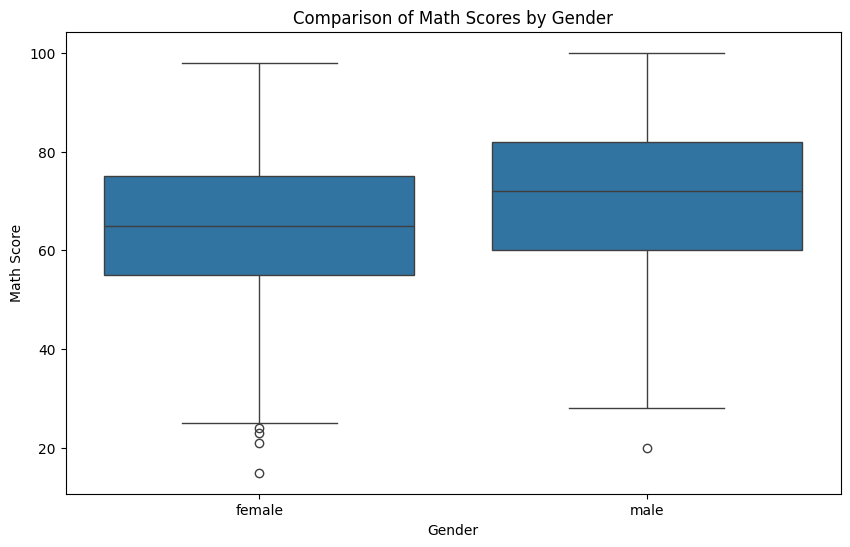

In [8]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Comparison of Math Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

In [9]:
female_race_stats = female_df.groupby('race/ethnicity')['math score'].describe()
print(female_race_stats)

                count       mean        std   min   25%   50%   75%   max
race/ethnicity                                                           
group A          41.0  62.951220  10.674622  34.0  57.0  62.0  70.0  83.0
group B         112.0  62.267857  14.691410  27.0  52.0  62.0  73.0  92.0
group C         151.0  63.019868  14.913292  21.0  54.0  65.0  72.5  92.0
group D         118.0  63.838983  15.220303  15.0  54.5  65.0  74.0  94.0
group E          70.0  75.214286  14.052585  41.0  65.0  78.0  86.0  98.0


In [10]:
male_race_stats = male_df.groupby('race/ethnicity')['math score'].describe()
print(male_race_stats)

                count       mean        std   min    25%   50%   75%    max
race/ethnicity                                                             
group A          38.0  68.657895  13.703967  37.0  59.00  69.5  79.0   96.0
group B          86.0  66.418605  14.230427  33.0  56.25  66.0  76.0  100.0
group C         172.0  67.697674  13.971625  20.0  59.00  68.0  77.0   95.0
group D         139.0  73.158273  15.036313  35.0  63.00  73.0  82.0  100.0
group E          73.0  79.547945  13.532924  43.0  72.00  82.0  89.0  100.0


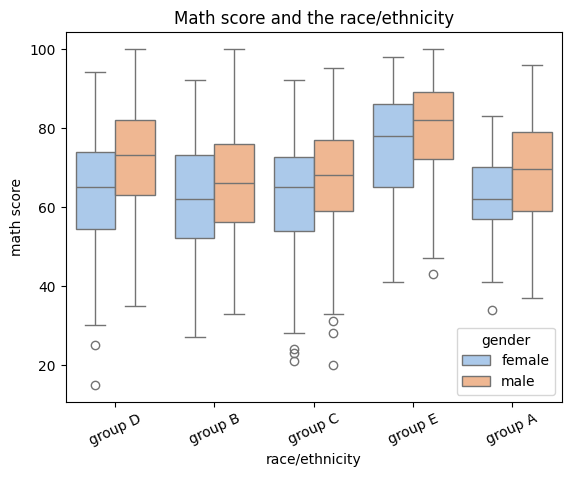

In [11]:
sns.boxplot(x = "race/ethnicity", y = "math score", hue = "gender", palette = "pastel", data = df)
plt.xticks(rotation=25)
plt.title('Math score and the race/ethnicity')
plt.show()

In [13]:
education_order = [
    "master's degree",
    "bachelor's degree",
    "associate's degree",
    "some college",
    "high school",
    "some high school"
]

df['parental level of education'] = pd.Categorical(
    df['parental level of education'],
    categories=education_order,
    ordered=True
)

df = df.sort_values(by='parental level of education')

parents_stats = df.groupby('parental level of education')['math score'].describe()
print(parents_stats)


                             count       mean        std   min   25%   50%  \
parental level of education                                                  
master's degree               75.0  71.026667  14.189807  32.0  62.0  70.0   
bachelor's degree            105.0  69.866667  14.262017  39.0  61.0  68.0   
associate's degree           204.0  70.348039  14.821813  28.0  61.0  72.0   
some college                 224.0  68.642857  14.552738  27.0  59.0  70.0   
high school                  215.0  65.381395  15.971459  15.0  55.0  66.0   
some high school             177.0  64.197740  15.739730  23.0  54.0  64.0   

                              75%    max  
parental level of education               
master's degree              82.0  100.0  
bachelor's degree            81.0  100.0  
associate's degree           82.0  100.0  
some college                 80.0  100.0  
high school                  77.5  100.0  
some high school             74.0  100.0  


/var/folders/rd/61q0tgy52hn29lz2xfggbcnw0000gn/T/ipykernel_67548/2796193884.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  parents_stats = df.groupby('parental level of education')['math score'].describe()


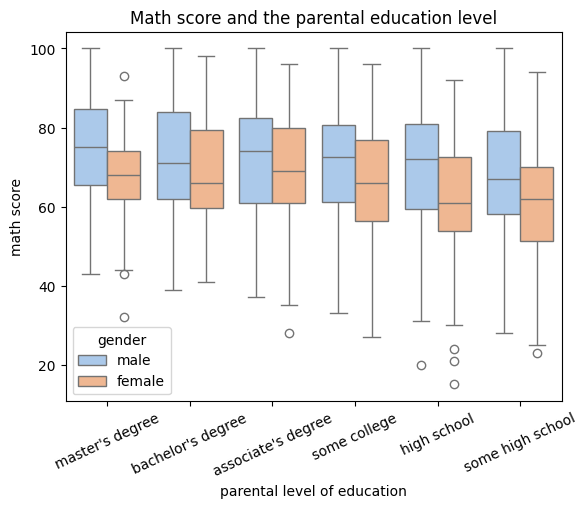

In [14]:
sns.boxplot(x = "parental level of education", y = "math score", hue = "gender", palette = "pastel", data = df)
plt.xticks(rotation=25)
plt.title('Math score and the parental education level')
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

df.rename(columns={'race/ethnicity': 'race'}, inplace=True)
df.rename(columns={'parental level of education': 'parents_education'}, inplace=True)

model = ols('Q("math score") ~ C(gender) + C(parents_education) + C(race)', data=df).fit()
ancova_table = sm.stats.anova_lm(model, typ=2)

print(ancova_table)

                             sum_sq     df          F        PR(>F)
C(gender)               8092.095570    1.0  40.159076  3.551026e-10
C(parents_education)    6351.401902    5.0   6.304088  9.051222e-06
C(race)                18155.689375    4.0  22.525553  7.968034e-18
Residual              199284.528747  989.0        NaN           NaN


F (F-statistic): This is the ratio of the mean square deviations explained by the variable to the mean square deviations explained by the residuals. It measures the impact of each independent variable relative to the variability within the groups not explained by the models.

PR(>F) (p-value): This indicates the probability that you would get the observed F value if the hypothesis that there is no difference between the groups is true. A lower p-value indicates stronger evidence against the null hypothesis (that there is no effect).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class HeatmapGenerator:
    def __init__(self, data):
        """
        Initializes the HeatmapGenerator class.

        Parameters:
        - data (pd.DataFrame): The dataset containing the data for the heatmap.
        """
        self.data = data

    def bin_scores(self, bin_size=10):
        """
        Bins the math, reading, and writing scores into intervals.

        Parameters:
        - bin_size (int, optional): The size of each bin interval (default is 10).

        Returns:
        - pd.DataFrame: The dataset with binned scores.
        """
        self.data['math_score_bins'] = pd.cut(self.data['math score'], bins=np.arange(0, 101, bin_size))
        self.data['reading_score_bins'] = pd.cut(self.data['reading score'], bins=np.arange(0, 101, bin_size))
        self.data['writing_score_bins'] = pd.cut(self.data['writing score'], bins=np.arange(0, 101, bin_size))

    def plot_normalized_heatmap(self, group_by_column, score_bin_column, title, cmap='viridis', figsize=(10, 8)):
        """
        Plots a normalized heatmap showing the relative frequency of scores for a specific grouping.

        Parameters:
        - group_by_column (str): The column by which to group (e.g., 'race/ethnicity', 'gender', 'parental level of education').
        - score_bin_column (str): The column containing binned scores (e.g., 'math_score_bins').
        - title (str): Title of the heatmap.
        - cmap (str, optional): The color map to use for the heatmap.
        - figsize (tuple, optional): Figure size of the heatmap.
        """
        # Compute the frequency of scores by group
        frequency_table = pd.crosstab(self.data[group_by_column], self.data[score_bin_column])

        # Normalize the frequency table by dividing by the row sums
        normalized_frequency_table = frequency_table.div(frequency_table.sum(axis=1), axis=0)

        # Plot the normalized heatmap
        plt.figure(figsize=figsize)
        sns.heatmap(normalized_frequency_table, annot=True, cmap=cmap, linewidths=0.5, fmt='.2f')
        plt.title(title)
        plt.xlabel('Score Bins')
        plt.ylabel(group_by_column)
        plt.show()

# Adjust the path if necessary
df = pd.read_csv('../data/exams.csv')

# Initialize HeatmapGenerator
heatmap_gen = HeatmapGenerator(data=df)

# Bin the scores
heatmap_gen.bin_scores(bin_size=10)

In [ ]:
# Plot normalized heatmaps for different groupings
heatmap_gen.plot_normalized_heatmap(group_by_column='race/ethnicity', score_bin_column='math_score_bins', 
                                    title='Normalized Frequency of Math Scores by Ethnicity')

heatmap_gen.plot_normalized_heatmap(group_by_column='gender', score_bin_column='math_score_bins', 
                                    title='Normalized Frequency of Math Scores by Gender')

heatmap_gen.plot_normalized_heatmap(group_by_column='parental level of education', score_bin_column='math_score_bins', 
                                    title='Influence of Parental Education on Math Scores (Normalized)')